In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from utils import video2st_maps as v2m
import config
import cv2

from utils.dataset import DataLoaderRhythmNet
import torch

In [ ]:
# video files are st_maps
test_video_dir = '../data/st_maps/test'
train_video_dir = '../data/st_maps/train'
video_files_train = os.listdir("../data/st_maps/train/")
video_files_test = os.listdir("../data/st_maps/test/")
test_video_items = [test_video_dir+'/'+filename for filename in os.listdir(test_video_dir)] 
train_video_items = [train_video_dir+'/'+filename for filename in os.listdir(train_video_dir)] 
TARGET_SIGNAL_DIR = '../data/hr_data'
# --------------------------------------
# Build Dataloaders
# --------------------------------------
def collate_fn(batch):
    '''the collate function ensures that the maps of different sizes are stackable'''
    batched_st_map, batched_targets = [], []
    # for data in batch:
    #     batched_st_map.append(data["st_maps"])
    #     batched_targets.append(data["target"])
    # # torch.stack(batched_output_per_clip, dim=0).transpose_(0, 1)
    return batch

train_set = DataLoaderRhythmNet(st_maps_path=train_video_items, target_signal_path=TARGET_SIGNAL_DIR)

train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=1,
    num_workers=0,
    shuffle=False,
    collate_fn=collate_fn
)
print('\nTrain DataLoader constructed successfully!')

In [ ]:
video_path = '../data/test/cpi_rotation.mp4'
cap = cv2.VideoCapture(video_path)
cap.get(5)

25.0

In [ ]:
meta = v2m.get_frames_and_video_meta_data(video_path,True)
meta

{'frame_rate': 25.0, 'sliding_window_stride': 12, 'num_frames': 2020}

In [ ]:
v2m.get_spatio_temporal_map_threaded(video_path)

In [3]:
import pyVHR as vhr

In [4]:
import os
import glob

In [5]:
allvideo = glob.glob('../*/*/*/*.mp4',recursive=True)

In [6]:
file = allvideo[-1]
file_name = file.split(os.sep)[-1].split('.')[0]
folder_name = file.split(os.sep)[-2]


In [8]:
st_map = np.load('../data/st_maps/test/harun_resting.npy')

In [9]:
map_shape = st_map.shape
maps = st_map.reshape((-1, map_shape[3], map_shape[1], map_shape[2]))
maps.shape

(124, 3, 300, 25)

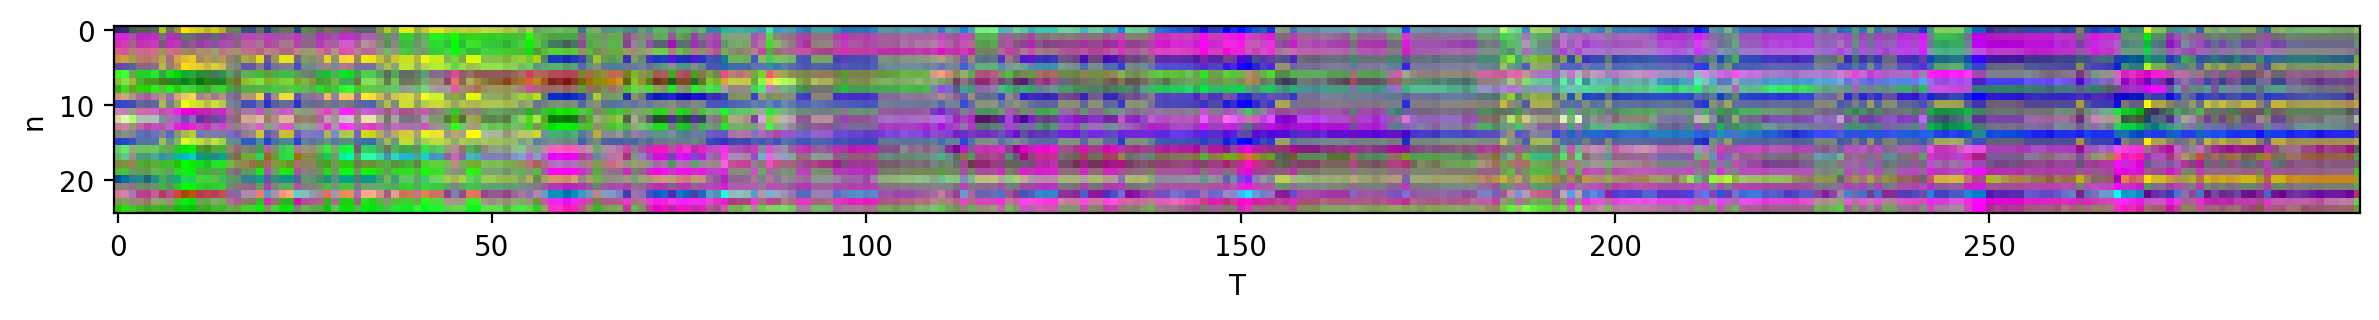

In [18]:
fig, ax = plt.subplots(figsize=(12,1.5),dpi=200)
ax.imshow(np.transpose(st_map[0,:,:,:].astype(np.uint8),(1,0,2)));
ax.set_xlabel('T')
ax.set_ylabel('n')
plt.tight_layout()
plt.savefig('spm.pdf')

In [ ]:
st_map_torch = next(iter(train_loader))

In [ ]:
# batch x n_maps x n_channels x T (clip size) x n (#face regions)
st_map_torch[0]['st_maps'].size()

torch.Size([83, 3, 300, 25])

In [ ]:
a = st_map_torch[0]['st_maps'].numpy()
b = a.reshape((-1, a.shape[3], a.shape[1], a.shape[2]))
b.shape

(83, 25, 3, 300)

In [ ]:
st_map_torch[0]['st_maps'][0,:,:,:].numpy().astype(np.uint8).shape

(3, 300, 25)

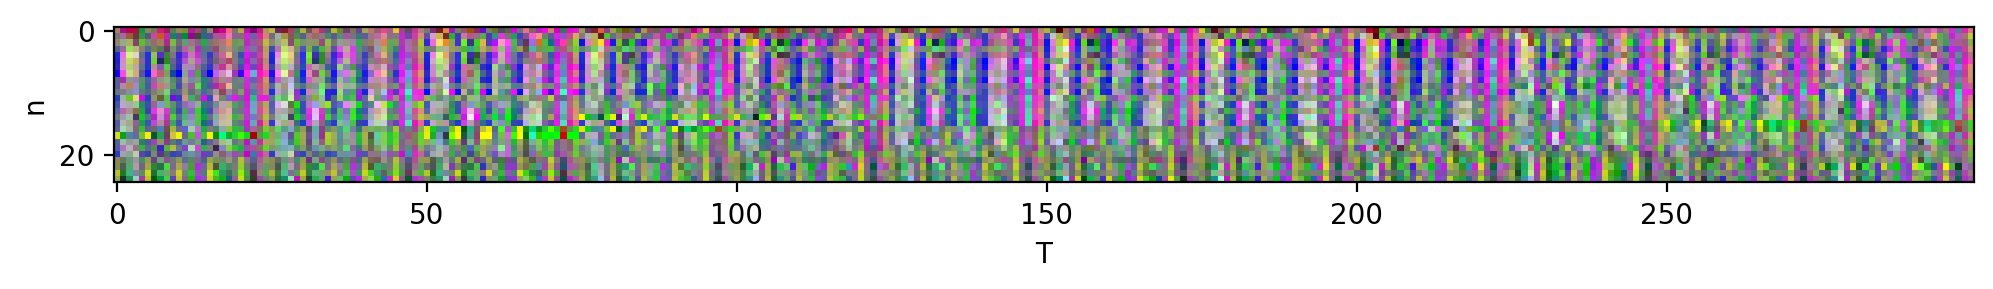

In [ ]:
fig, ax = plt.subplots(figsize=(12,12),dpi=200)
ax.imshow(np.reshape(st_map_torch[0]['st_maps'][0,:,:,:].numpy().astype(np.uint8),(25,300,3)));
ax.set_xlabel('T')
ax.set_ylabel('n')
plt.savefig('spm.png')

In [ ]:
# for video of st map
# for i in range(st_map.shape[0]):
#     fig, ax = plt.subplots(figsize=(12,12),dpi=200)
#     ax.imshow(np.transpose(st_map[i,:,:,:].astype(np.uint8),(1,0,2)));
#     ax.set_xlabel('T')
#     ax.set_ylabel('n')
#     plt.savefig(f'spms/spm{i}.png')
#     plt.close(fig)